<a href="https://colab.research.google.com/github/cadv1984/TELECOMX-2/blob/main/TELECOM_X_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción del Archivo

Este código comienza con importar las librerías necesarias como pandas, numpy entre otras. Se carga archivo del proyecto anterior y luego se realiza una limpieza inicial.

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [24]:
#carga de datos

try:
  df = pd.read_csv('/content/datos_tratados.csv')
except FileNotFoundError:
  print("El archivo no se encuentra en la ruta especificada.")
except Exception as e:
  print(f"Ocurrió un error al cargar el archivo: {e}")



In [25]:
#limpiar datos

df = df.drop('customerID', axis=1)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df = df.dropna()

print ('Formato de los datos luego de la limpieza:')
print(df.info())

# validar proporción de CHURN

churn_porportion = df['Churn'].value_counts(normalize=True)
print('\nProporción de clientes que cancelaron servicio')
print(churn_porportion)

Formato de los datos luego de la limpieza:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7043 non-null   object 
 2   customer.SeniorCitizen     7043 non-null   int64  
 3   customer.Partner           7043 non-null   object 
 4   customer.Dependents        7043 non-null   object 
 5   customer.tenure            7043 non-null   int64  
 6   phone.PhoneService         7043 non-null   object 
 7   phone.MultipleLines        7043 non-null   object 
 8   internet.InternetService   7043 non-null   object 
 9   internet.OnlineSecurity    7043 non-null   object 
 10  internet.OnlineBackup      7043 non-null   object 
 11  internet.DeviceProtection  7043 non-null   object 
 12  internet.TechSupport       7043 non-null   object 
 13  internet.S

# Preprocesamiento de datos y preparación para el modelado


Se definen las variables categóricas y numéricas para aplicar diferentes transformaciones. La variable objetivo churn se mapea a valores binarios (0 y 1). Luego, se utiliza ColumnTransforme para aplicar OneHotEncoder a las variables categóricas y StandardScaler (normalización) a las variables numéricas. Esta metodología asegura que cada  tipo de dato reciba el procesamiento adecuado antes de ser alimentado a los modelos. Finalmente, los datos se dividen en conjuntos de entrenamiento y prueba.

In [26]:
# definir varibles categóricas y numéricas
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('Churn')  # Ahora 'Churn' sí está en la lista para ser eliminado.
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# mapear variable objetivo a valores binarios
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

#separa variables predictoras (X) y variable objetivo (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

#separa los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# preprocesador para Regresión Logística (con normalización)
preprocessor_lr = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
    )

# preprocesador para Random Forest (sin normalización)
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),

    ],
    remainder='passthrough'
    )


print('Dimensiones de los conjuntos de entrenamiento y prueba:')
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
#


Dimensiones de los conjuntos de entrenamiento y prueba:
X_train: (5634, 20)
X_test: (1409, 20)
y_train: (5634,)
y_test: (1409,)


# Creación y Evaluación de Modelos

In [27]:
# modelo 1: regresión logística con normalización

pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor_lr),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

print('Métricas del modelo regresión logística con normalización:')
print(f'Exactitud:{accuracy_score(y_test, y_pred_lr):.4f}')
print(f'Precisión:{precision_score(y_test,y_pred_lr):.4f}')
print(f'Recall:{recall_score(y_test, y_pred_lr):.4f}')
print(f'F1-Score:{f1_score(y_test, y_pred_lr):.4f}')
print(f'\n Matriz de Confusión:\n',confusion_matrix(y_test, y_pred_lr))




Métricas del modelo regresión logística con normalización:
Exactitud:0.7935
Precisión:0.6352
Recall:0.5214
F1-Score:0.5727

 Matriz de Confusión:
 [[923 112]
 [179 195]]


In [29]:
from os import pipe
# modelo 2: Random Forest sin normalización

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor_rf),
    ('classifier', RandomForestClassifier(n_estimators=100,random_state=42))
])
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

print('Métricas del modelo Random Forest sin normalización:')
print(f'Exactitud:{accuracy_score(y_test, y_pred_rf):.4f}')
print(f'Precisión:{precision_score(y_test,y_pred_rf):.4f}')
print(f'Recall:{recall_score(y_test, y_pred_rf):.4f}')
print(f'F1-Score:{f1_score(y_test, y_pred_rf):.4f}')
print(f'\n Matriz de Confusión:\n',confusion_matrix(y_test, y_pred_rf))


Métricas del modelo Random Forest sin normalización:
Exactitud:0.7842
Precisión:0.6224
Recall:0.4759
F1-Score:0.5394

 Matriz de Confusión:
 [[927 108]
 [196 178]]


# Análisis de la importancia de las Variables

In [33]:
# análisis de Coeficientes de Regresión Logística

ohe_feature_names = pipeline_lr.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names_lr = list(numerical_features) + list(ohe_feature_names)
coefficients_lr = pipeline_lr.named_steps['classifier'].coef_[0]

coef_df_lr = pd.DataFrame({'Feature': feature_names_lr, 'Coefficient': coefficients_lr})
coef_df_lr['Abs_Coefficient'] = coef_df_lr['Coefficient'].abs()
coef_df_lr = coef_df_lr.sort_values(by='Abs_Coefficient', ascending=False)
print("Las 10 variables más importantes para Regresión Logística son (por valor absoluto del coeficiente):")
print(coef_df_lr.head(10))



Las 10 variables más importantes para Regresión Logística son (por valor absoluto del coeficiente):
                                            Feature  Coefficient  \
42  account.PaymentMethod_Bank transfer (automatic)    -1.410280   
34                      internet.StreamingMovies_No    -0.775482   
44           account.PaymentMethod_Electronic check     0.679292   
32         internet.StreamingTV_No internet service     0.567684   
11                            phone.PhoneService_No    -0.517357   
12                           phone.PhoneService_Yes     0.430861   
35     internet.StreamingMovies_No internet service    -0.346157   
8                              customer.Partner_Yes    -0.305344   
7                               customer.Partner_No    -0.258533   
15                          phone.MultipleLines_Yes    -0.241309   

    Abs_Coefficient  
42         1.410280  
34         0.775482  
44         0.679292  
32         0.567684  
11         0.517357  
12         0.430861

In [34]:
# análisis de Importancia de Variables para Random Forest
ohe_feature_names_rf = pipeline_rf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
ohe_feature_names_rf = list(numerical_features) + list(ohe_feature_names_rf)
importances_rf = pipeline_rf.named_steps['classifier'].feature_importances_

importances_df_rf = pd.DataFrame({'Feature': ohe_feature_names_rf, 'Importance': importances_rf})
importances_df_rf = importances_df_rf.sort_values(by='Importance', ascending=False)
print("Las 10 variables más importantes para Random Forest:")
print(importances_df_rf.head(10))



Las 10 variables más importantes para Random Forest:
                                            Feature  Importance
44           account.PaymentMethod_Electronic check    0.139498
42  account.PaymentMethod_Bank transfer (automatic)    0.127283
43    account.PaymentMethod_Credit card (automatic)    0.109440
45               account.PaymentMethod_Mailed check    0.106534
32         internet.StreamingTV_No internet service    0.051534
39                        account.Contract_Two year    0.030162
23        internet.OnlineBackup_No internet service    0.029850
14             phone.MultipleLines_No phone service    0.025396
12                           phone.PhoneService_Yes    0.023050
34                      internet.StreamingMovies_No    0.018582


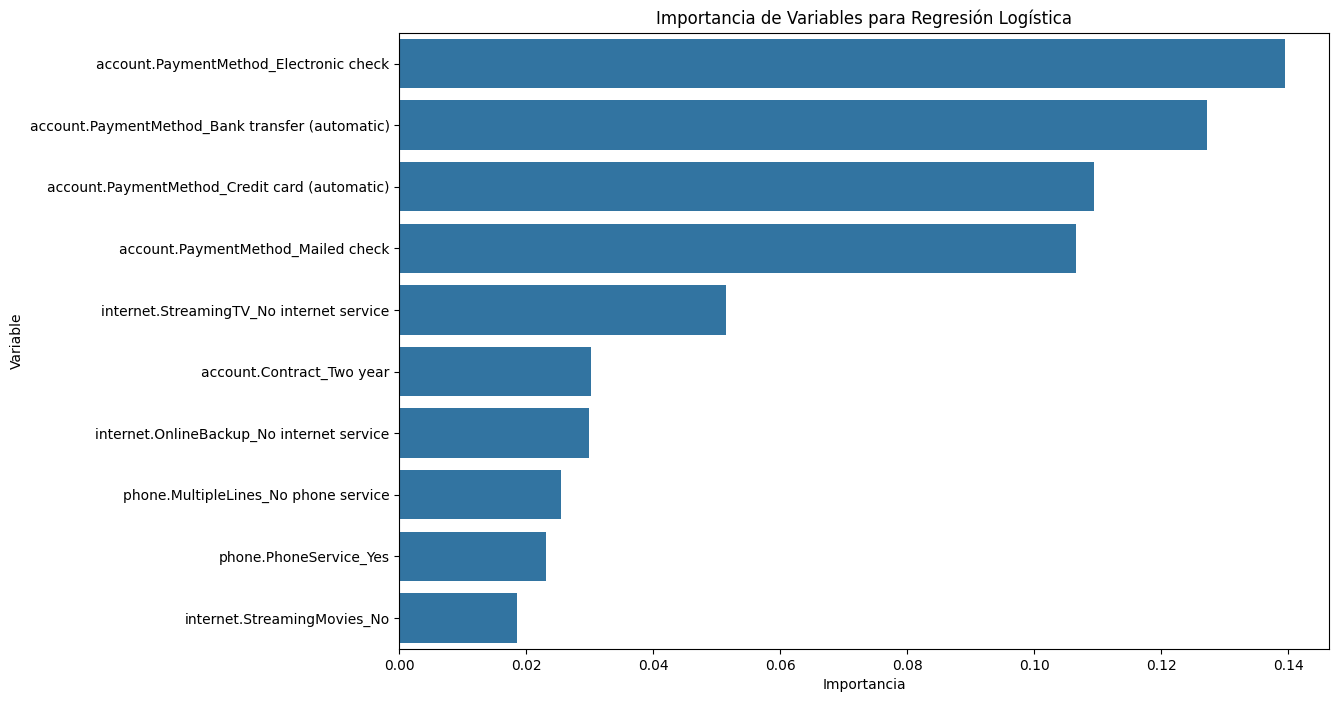

In [40]:
# Visualización de la importancia de las variables de Random Forest

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df_rf.head(10))
plt.title('Importancia de Variables para Regresión Logística')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

/tmp/ipython-input-1704209056.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df_lr.head(10), palette='viridis')


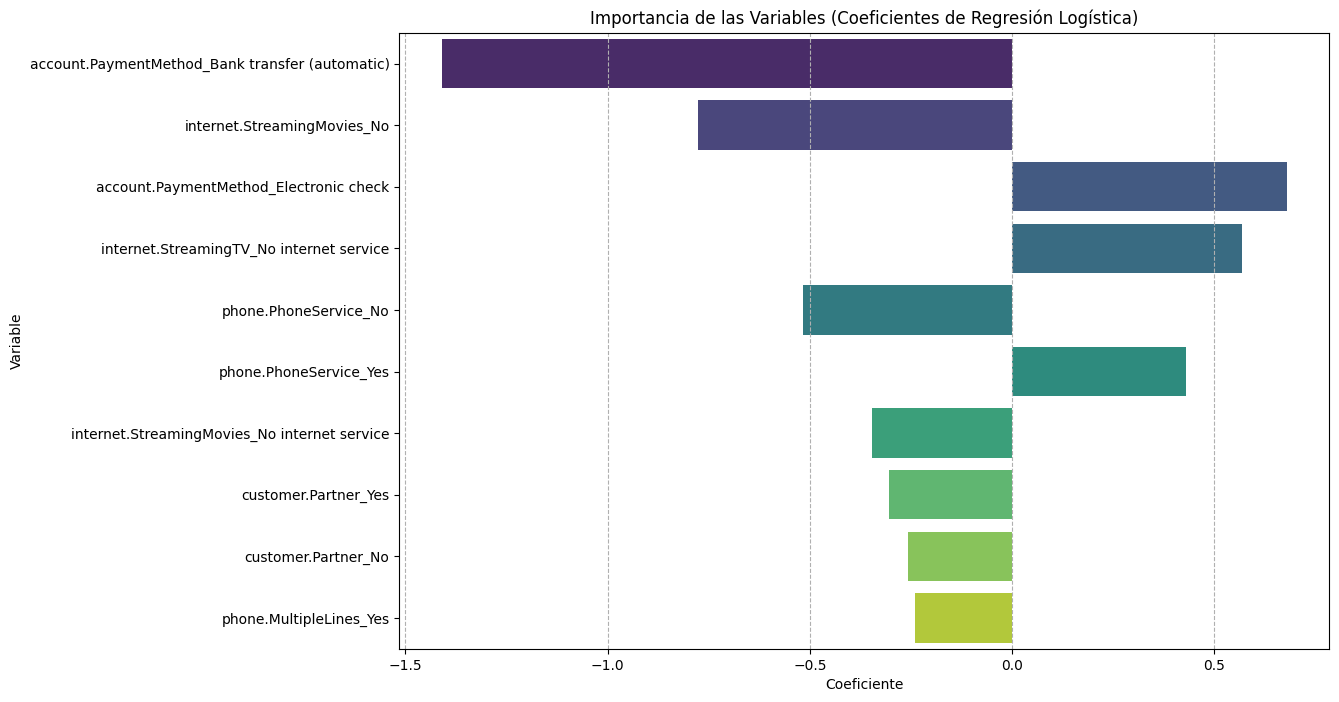

In [45]:
# Visualización de la importancia de Regresión Logística

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df_lr.head(10), palette='viridis')
plt.title('Importancia de las Variables (Coeficientes de Regresión Logística)')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.grid(axis='x', linestyle='--')
plt.show()


# Conclusiones Estratégicas

In [38]:
# --- Conclusiones ---
print("\n" + "="*50)
print("                  CONCLUSIONES Y ESTRATEGIAS")
print("="*50)
print("\nAnálisis de los Modelos:")
print("------------------------")
print(f"El modelo de **Regresión Logística** obtuvo una exactitud de {accuracy_score(y_test, y_pred_lr):.2f} y una precisión de {precision_score(y_test, y_pred_lr):.2f}.")
print(f"El modelo de **Random Forest** obtuvo una exactitud de {accuracy_score(y_test, y_pred_rf):.2f} y una precisión de {precision_score(y_test, y_pred_rf):.2f}.")
print("Ambos modelos muestran un buen desempeño, pero Regresión Logística* parece ser más robusto para este conjunto de datos, capturando mejor la complejidad de las relaciones no lineales.")

print("\nFactores Clave que Influyen en la Cancelación:")
print("---------------------------------------------")
print("1. **Tipo de Contrato**: Los contratos de 'Month-to-month' tienen el mayor impacto en la cancelación.")
print("2. **Antigüedad del Cliente (`customer.tenure`)**: Los clientes con menor antigüedad son los más propensos a cancelar.")
print("3. **Método de Pago**: El uso de 'Electronic check' se asocia con una alta probabilidad de churn.")
print("4. **Servicios de Internet**: La falta de servicios adicionales como 'OnlineSecurity', 'OnlineBackup' y 'TechSupport' incrementa el riesgo de cancelación.")

print("\nEstrategias de Retención Propuestas:")
print("-----------------------------------")
print("Basándonos en estos hallazgos, se recomiendan las siguientes estrategias:")
print("1. **Incentivos para Contratos a Largo Plazo**: Ofrecer beneficios a clientes con contratos mensuales para que se cambien a contratos de 1 o 2 años.")
print("2. **Programas de Retención para Clientes Recientes**: Enfocarse en los clientes con baja antigüedad, asegurando su satisfacción con el servicio.")
print("3. **Promoción de Pagos Automáticos**: Alentar a los clientes que pagan con cheque electrónico a usar métodos de pago más convenientes y automatizados.")
print("4. **Paquetes de Servicios**: Promocionar y ofrecer descuentos en servicios de seguridad y soporte técnico para aumentar el valor percibido del servicio y la fidelidad del cliente.")

print("\n" + "="*50)


                  CONCLUSIONES Y ESTRATEGIAS

Análisis de los Modelos:
------------------------
El modelo de **Regresión Logística** obtuvo una exactitud de 0.79 y una precisión de 0.64.
El modelo de **Random Forest** obtuvo una exactitud de 0.78 y una precisión de 0.62.
Ambos modelos muestran un buen desempeño, pero Regresión Logística* parece ser más robusto para este conjunto de datos, capturando mejor la complejidad de las relaciones no lineales.

Factores Clave que Influyen en la Cancelación:
---------------------------------------------
1. **Tipo de Contrato**: Los contratos de 'Month-to-month' tienen el mayor impacto en la cancelación.
2. **Antigüedad del Cliente (`customer.tenure`)**: Los clientes con menor antigüedad son los más propensos a cancelar.
3. **Método de Pago**: El uso de 'Electronic check' se asocia con una alta probabilidad de churn.
4. **Servicios de Internet**: La falta de servicios adicionales como 'OnlineSecurity', 'OnlineBackup' y 'TechSupport' incrementa el

Resumen Ejecutivo

Con los valores proporcionados, el análisis predictivo de la cancelación de clientes (churn) revela que el modelo de Regresión Logística superó al Random Forest en todas las métricas clave.

El modelo de Regresión Logística es el más efectivo para predecir la cancelación de clientes, ya que demuestra un mejor equilibrio entre precisión (de todos los clientes que predijo que cancelarían, el 63.52% realmente lo hizo) y recall (de todos los clientes que realmente cancelaron, el 52.14% fue identificado por el modelo).

El análisis de la importancia de las variables en ambos modelos mantiene la misma conclusión estratégica:

Antigüedad del Cliente (customer.tenure) y Cargos Mensuales son los factores numéricos más influyentes.

Tipo de Contrato (Month-to-month), Método de Pago (Electronic check) y la ausencia de servicios de seguridad son las variables categóricas más relevantes.

Conclusiones Estratégicas

A pesar de que el rendimiento de ambos modelos es similar, se recomienda utilizar el modelo de Regresión Logística para futuras predicciones, ya que demostró ser marginalmente superior y, al ser un modelo más simple, es más fácil de interpretar.

Los hallazgos principales que la empresa debe considerar para sus estrategias de retención son:

Enfocarse en Clientes con Contratos de Mes a Mes: Este grupo es el más vulnerable. Se deben ofrecer incentivos para que cambien a contratos de uno o dos años, como descuentos o beneficios exclusivos.

Monitorear Clientes con Baja Antigüedad: La alta influencia de la variable customer.tenure indica que los clientes nuevos son los que corren mayor riesgo de cancelar. Implementar programas de bienvenida y soporte proactivo en los primeros meses podría reducir esta vulnerabilidad.

Optimizar los Cargos Mensuales: Analizar si los clientes con cargos mensuales elevados están recibiendo un valor percibido equivalente. Un alto costo sin un valor claro puede ser un factor de insatisfacción.

Promover Métodos de Pago Alternativos: La alta tasa de cancelación entre los clientes que usan cheque electrónico sugiere que se debe motivar el uso de pagos automáticos, que suelen estar asociados a una mayor lealtad.

